In [21]:
import pandas as pd

df = pd.read_csv('Document from George.csv')
df['Order date'] = pd.to_datetime(df['Order date'])
df['Delivery date'] = pd.to_datetime(df['Delivery date'])
df['time_diff_minutes'] = ( df['Delivery date'] - df['Order date']) / pd.Timedelta(minutes=1)
df

,Unnamed: 0,Warehouse,Order date,Delivery date,Customer,Zipcode,time_diff_minutes
0,0,Butler,2021-02-09 10:49:00,2021-02-11 12:40:00,12392,15017,2991.0
1,1,Butler,2021-02-12 08:59:00,2021-02-15 16:12:00,12392,15017,4753.0
2,2,Washington,2021-02-12 09:01:00,2021-02-15 16:15:00,12392,15017,4754.0
3,3,McKees Rocks,2021-02-13 07:45:00,2021-02-15 16:16:00,12392,15017,3391.0
4,5,Butler,2021-02-15 21:58:00,2021-02-16 16:50:00,12392,15017,1132.0
...,...,...,...,...,...,...,...
9475,10472,Washington,2022-11-12 18:43:00,2022-11-12 19:01:00,288530,15217,18.0
9476,10473,Pittsburgh Mills,2022-11-12 19:48:00,2022-11-12 19:48:00,227364,15112,0.0
9477,10474,Butler,2022-11-12 20:02:00,2022-11-12 20:02:00,270991,15216,0.0
9478,10475,Pittsburgh Mills,2022-11-12 20:09:00,2022-11-12 20:09:00,98234,15217,0.0


# total number of orders from each zip code permonth

In [78]:
out = pd.crosstab(df['Zipcode'], pd.PeriodIndex(df['Order date'], freq='M'))
out

col_0,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,...,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11
Zipcode,,,,,,,,,,,,,,,,,,,,,
15007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15017,8,4,6,3,14,5,3,4,2,0,...,18,17,17,18,19,16,15,6,10,2
15031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
44511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
44512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4


# percentage of customer returns within a week

# percentage of customer that never came back

In [31]:
sf = df.drop_duplicates(subset = 'Customer',keep = False)
print(len(sf) / len(df) * 100,'%')

#percentage of customers that only ordered once

8.354430379746836 %


In [33]:
af = df[df.Customer.duplicated(keep=False)]
af.time_diff_minutes.mean()

4600.346454880295

In [35]:
sf.time_diff_minutes.mean()

4462.021464646465

In [ ]:
#there isn't much correlation because the average delivery time for customers that returned is higher than those that didn't

# how fast do orders get delivered by zipcode

## average delivery time for each zipcode

In [44]:
wf = df.groupby('Zipcode')['time_diff_minutes'].mean()
wf = pd.DataFrame(wf)
wf.sort_values(by=['time_diff_minutes'], ascending=False)

,time_diff_minutes
Zipcode,
44485,46319.000000
15010,46319.000000
44320,46316.000000
15112,25541.230769
16001,16658.000000
...,...
26501,1588.000000
15147,1565.333333
16101,1455.000000


# from what warehouse do each zipcode have the most deliveries

In [57]:
df
#of = df.groupby(['Zipcode','Warehouse'])['Warehouse'].count()
s = df.groupby('Zipcode')['Warehouse'].apply(lambda x: x.value_counts().index[0]).reset_index()
s

,Zipcode,Warehouse
0,15007,Boardman
1,15010,Beaver Falls
2,15017,Washington
3,15031,Washington
4,15035,Pittsburgh Mills
...,...,...
92,44509,McKees Rocks
93,44511,Beaver
94,44512,Washington
95,44514,Boardman


# how fast does each zipcode grow with number of orders 

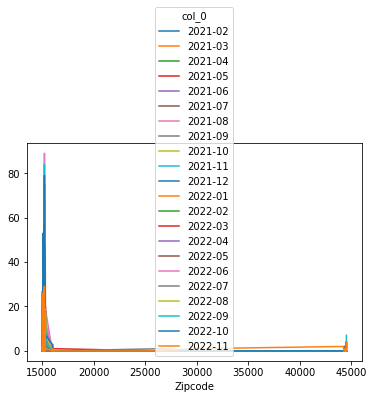

# is there a season factor

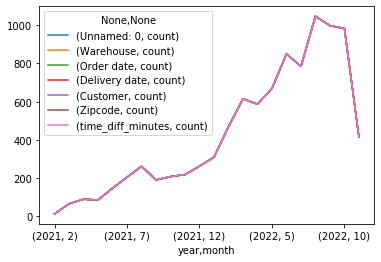

In [100]:
qf = df.groupby([df['Order date'].dt.year.rename('year'), df['Order date'].dt.month.rename('month')]).agg({'count'})
qf.plot()